In [1]:
import pandas as pd
dataset = pd.read_csv('/content/sample_data/factnews_dataset_factuality.csv', encoding='UTF-8')
dataset = dataset.sample(frac=1)

#Show the dataset information
dataset.info()
dataset.isnull()
print(dataset.shape)
dataset



<class 'pandas.core.frame.DataFrame'>
Index: 6191 entries, 5409 to 1811
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file        6191 non-null   object
 1   id_sente    6191 non-null   int64 
 2   id_article  6191 non-null   object
 3   domain      6191 non-null   object
 4   year        6191 non-null   int64 
 5   sentences   6191 non-null   object
 6   classe      6191 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 386.9+ KB
(6191, 7)


,file,id_sente,id_article,domain,year,sentences,classe
5409,C89_OGlobo_31-10-2007_14h42,5410,c89o,politics,2007,A carta de renúncia foi entregue ao deputado N...,0
580,C2_Estadao_04-08-2006_12h44,581,c2e,politics,2006,"Já o índice da candidata do PSOL, Heloísa Hele...",0
808,C23_Folha_20-07-2007_13h42,809,c23f,world,2007,Benn disse que oito alertas de enchentes sever...,0
2017,C43_Folha_17-07-2007_13h37,2018,c43f,politics,2007,A estratégia foi montada para evitar novos atr...,1
5760,C94_Estadao_18-10-2022_19h36,5761,c94e,politics,2022,"Apesar disso, Paulo Martins, o relator do proj...",0
...,...,...,...,...,...,...,...
853,C24_Estadao_14-12-2021_07h05_titulo,854,c24e,politics,2021,O ataque cibernético ocorrido ao aplicativo Co...,0
5452,C90_Folha_28-11-2007_00h00,5453,c90f,politics,2007,"Em entrevista ao ""Jornal da Record"", Lula crit...",1
3554,C64_Oglobo_14-10-2022_13h53,3555,c64o,culture,2022,"Ainda segundo a publicação, o ator estava com ...",0
976,C25_OGlobo_31-12-2021_21h56,977,c25o,culture,2021,Tinha 41 anos quando escreveu o primeiro roman...,0


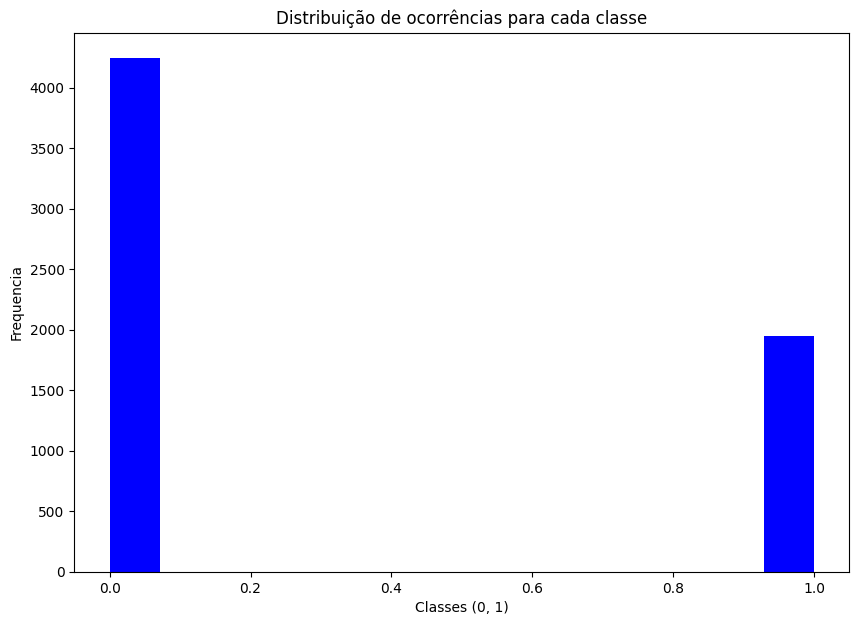

,count
classe,
0,4242
1,1949


In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
x = dataset ['classe']
plt.hist(x, bins = 'auto', color = "blue")
plt.title('Distribuição de ocorrências para cada classe')
plt.ylabel('Frequencia')
plt.xlabel('Classes (0, 1)')
plt.show()
#-----------------------------------------------------------
dataset ['classe'].value_counts()

In [3]:
#undersampling - deleting samples from the majority class
classe_0 = dataset[dataset.classe == 0]
classe_1 = dataset[dataset.classe == 1]

#Obtaining the less representative sample
sample_0 = classe_0.sample(n=1949, replace=True)
#sample_1 = classe_2.sample(n=336, replace=True)

#Concatenating new data with LESS representativeness into the initial dataset.
dataset_undersampling = pd.concat([classe_1, sample_0])

print(dataset_undersampling['classe'].value_counts())


classe
1    1949
0    1949
Name: count, dtype: int64


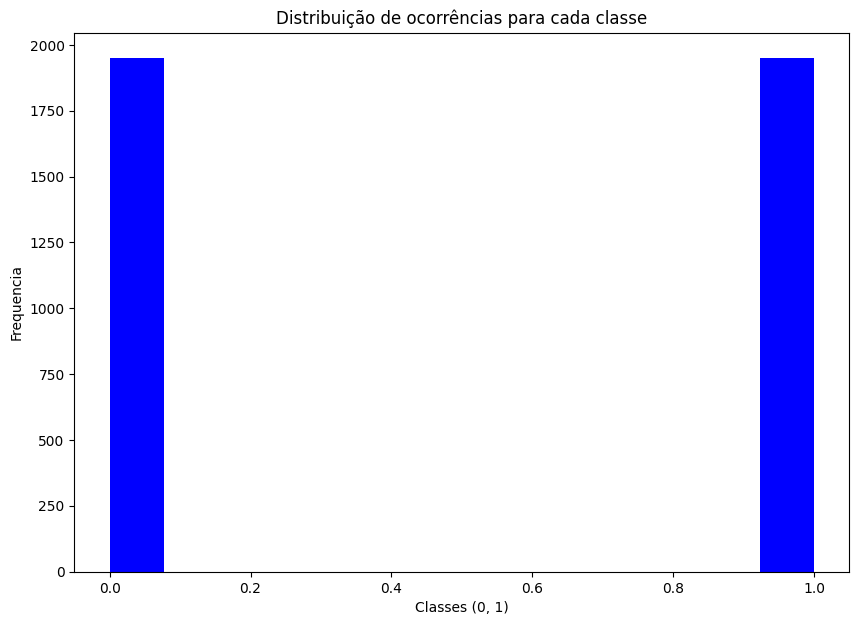

,count
classe,
1,1949
0,1949


In [4]:
#Balanced dataset
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
x = dataset_undersampling ['classe']
plt.hist(x, bins = 'auto', color = "blue")
plt.title('Distribuição de ocorrências para cada classe')
plt.ylabel('Frequencia')
plt.xlabel('Classes (0, 1)')
plt.show()

dataset_undersampling ['classe'].value_counts()

In [5]:
!pip install ktrain
!pip install torch
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 56.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 27.3 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=ba45c379603e82008b16df23514ad461dba934d46c9929ae18d68fac47c0ca1f
  Stored in directory: /root/.cache/pip/wheels/fa/6a/9c/8a873b38bbd8bc207d33c64726bd18f7ef85f8e70dc3ac2e4b
  Created wheel for keras_bert: filename=ke

In [6]:
import keras
import ktrain
from ktrain import text

#bert
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(dataset,
                                                                   'sentences',
                                                                   label_columns='classe',
                                                                   maxlen=64,
                                                                   max_features=500,
                                                                   preprocess_mode='bert',
                                                                   lang='pt',
                                                                   val_pct = 0.1,
                                                                   )

ImportError: `keras.optimizers.legacy` is not supported in Keras 3. When using `tf.keras`, to continue using a `tf.keras.optimizers.legacy` optimizer, you can install the `tf_keras` package (Keras 2) and set the environment variable `TF_USE_LEGACY_KERAS=True` to configure TensorFlow to use `tf_keras` when accessing `tf.keras`.

In [ ]:
#bert classifier
model = text.text_classifier('bert', (x_train, y_train) , preproc=preproc)
classifier = ktrain.get_learner(model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=64
                             )

Is Multi-Label? False
maxlen is 64


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
#Bert Classifier
classifier.fit_onecycle(0.00002,1)



begin training using onecycle policy with max lr of 2e-05...
88/88 [==============================] - 3125s 35s/step - loss: 0.4023 - accuracy: 0.8241 - val_loss: 0.3211 - val_accuracy: 0.8726


In [ ]:
classifier.validate()

20/20 [==============================] - 109s 5s/step
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       420
           1       0.90      0.68      0.77       200

    accuracy                           0.87       620
   macro avg       0.88      0.82      0.84       620
weighted avg       0.88      0.87      0.87       620



array([[405,  15],
       [ 64, 136]])

In [ ]:
#save model
predictor = ktrain.get_predictor(classifier.model, preproc).save('factual')

In [ ]:
#load model
predictor = ktrain.load_predictor('factual')


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
#use model
model = ktrain.get_predictor(predictor.model, predictor.preproc)
predictions = model.predict('bolsonaro está sendo julgado')
print(predictions)

not_classe
